In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mobile-featuers/features_mobile.csv
/kaggle/input/mobile-price-classification/train.csv
/kaggle/input/mobile-price-classification/test.csv


# 1-) Leitura dos Dados

In [2]:
mobile_df = pd.read_csv('../input/mobile-price-classification/train.csv')

mobile_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
print(f'Shape da base: {mobile_df.shape}')
mobile_df.info()

Shape da base: (2000, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-nu

In [4]:
print(mobile_df.describe(include='all'))

       battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.00000

# 2-) Analises

In [5]:
float_variables = ['clock_speed','m_dep','battery_power','fc','mobile_wt','px_height','px_width','ram','sc_h','sc_w','talk_time','int_memory','n_cores','pc']

2.1-) Variaveis categoricas - Distribuiçao 

In [6]:
discrete_variables_df = mobile_df.drop(float_variables,axis=1)
discrete_variables_df.head()

,blue,dual_sim,four_g,three_g,touch_screen,wifi,price_range
0,0,0,0,0,0,1,1
1,1,1,1,1,1,0,2
2,1,1,1,1,1,0,2
3,1,0,0,1,0,0,2
4,1,0,1,1,1,0,1


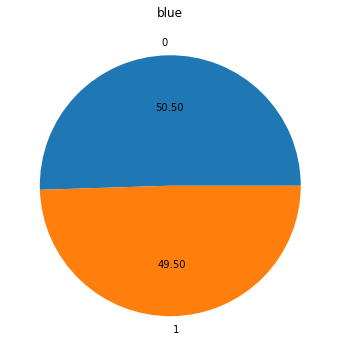

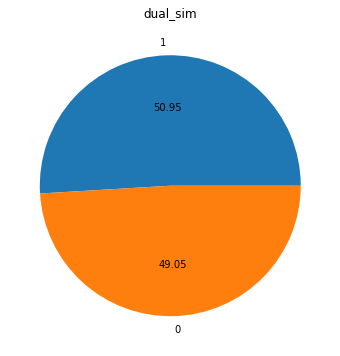

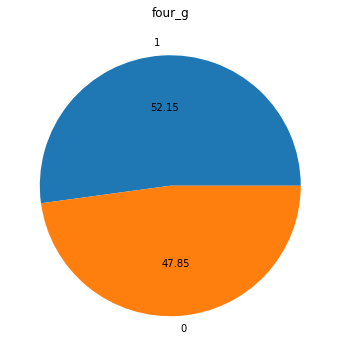

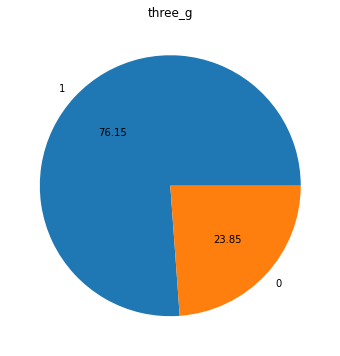

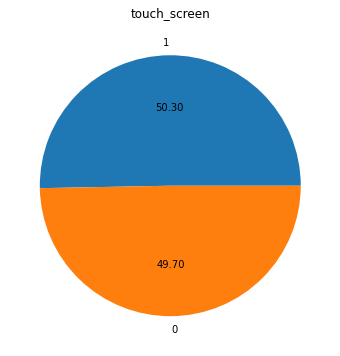

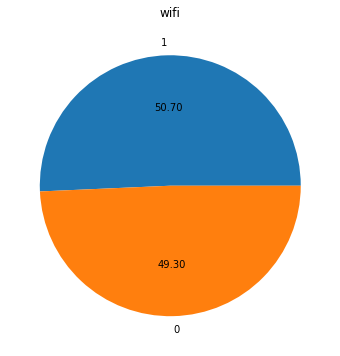

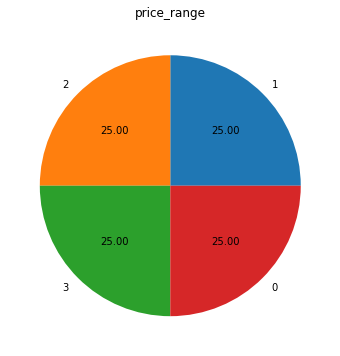

In [7]:
total = discrete_variables_df['blue'].count()
for c in discrete_variables_df.columns:
    series = (discrete_variables_df[c].value_counts()/discrete_variables_df[c].count()).to_frame().reset_index()
    fig,ax = plt.subplots(figsize=(6,6))
    ax.pie(x=series[c].values,labels=series['index'].values,autopct='%.2f')
    ax.set_title(c)
    fig.show()

Boa distruibuição das labels nas variaveis categoricas

Obs: Olhar com cautela a variavel: three_g

2.2-) Variaveis Continuas

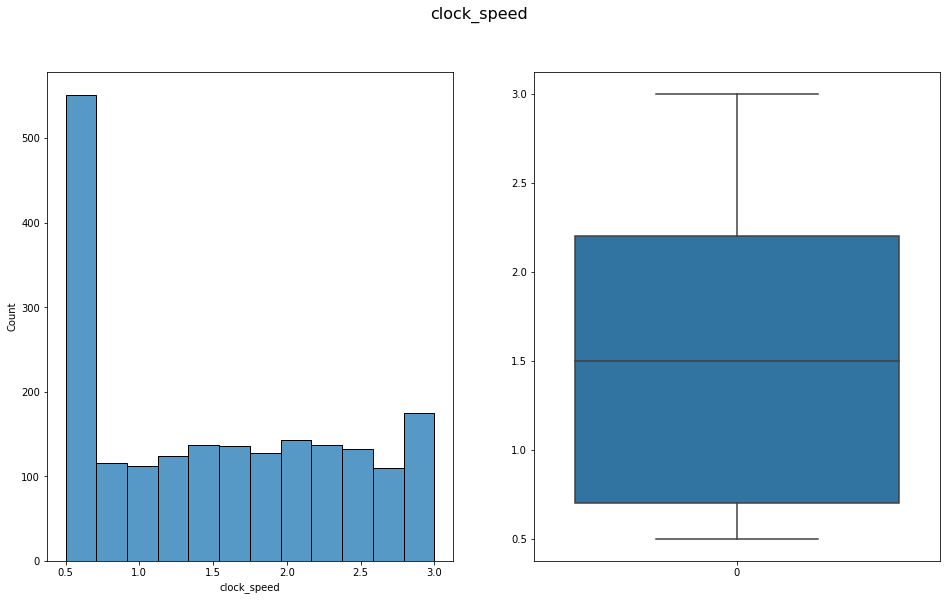

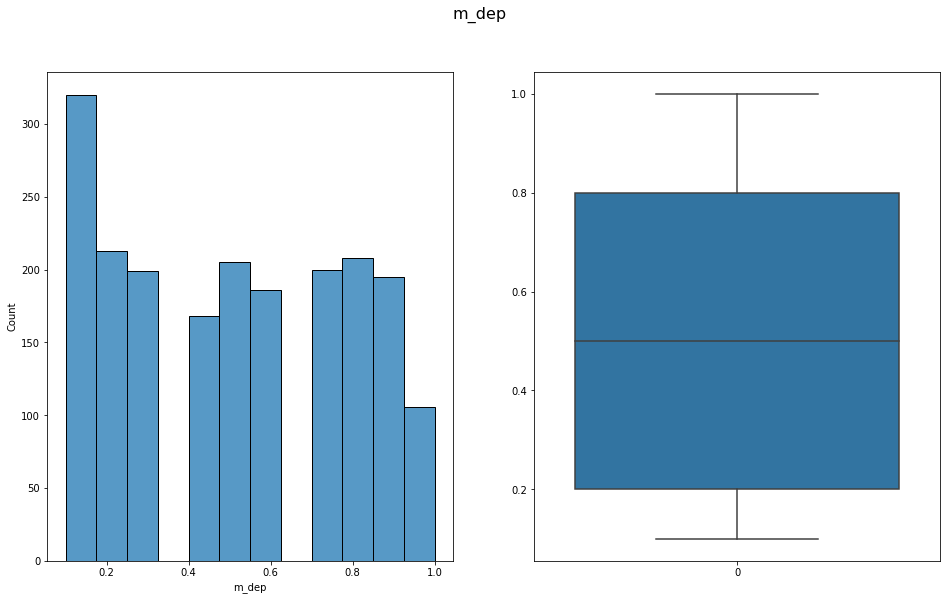

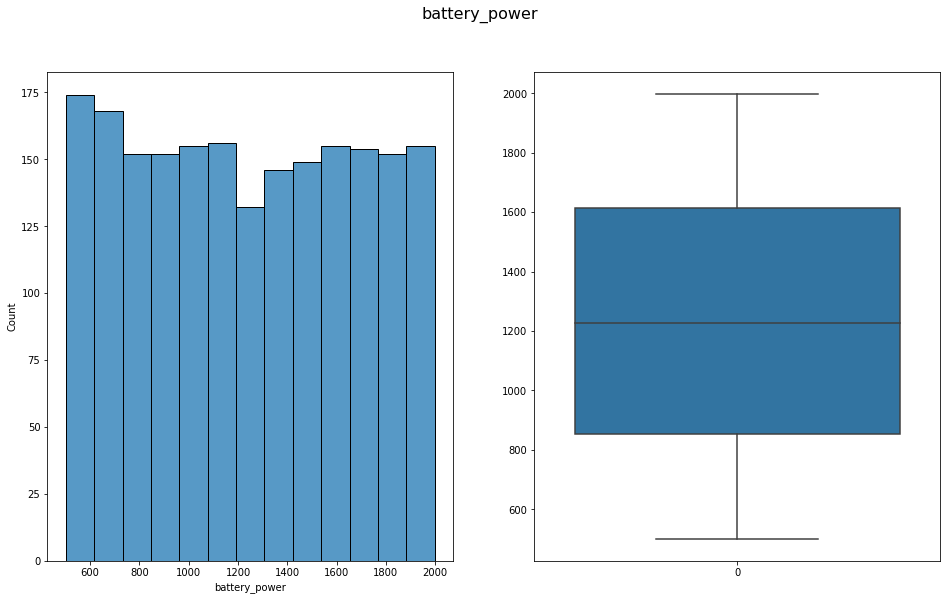

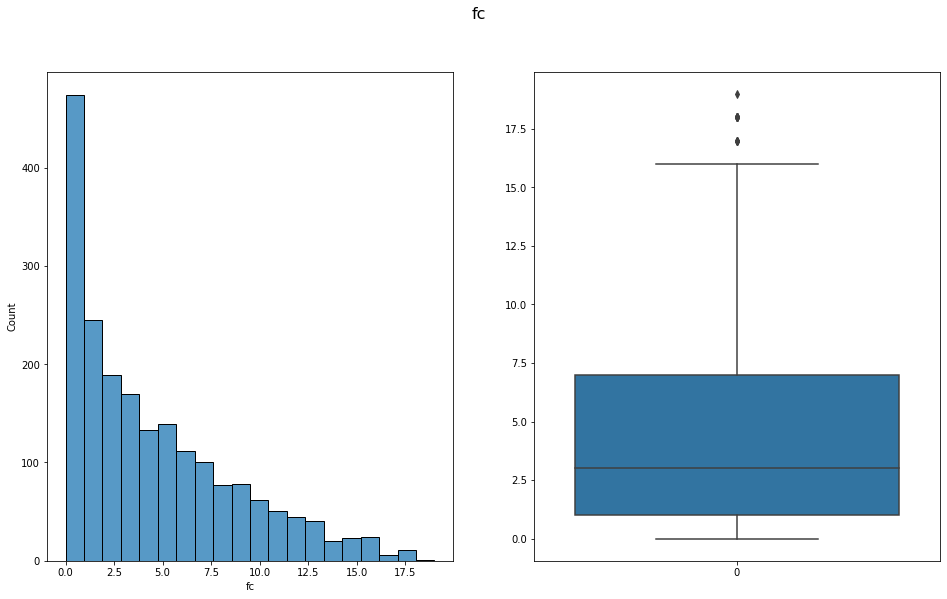

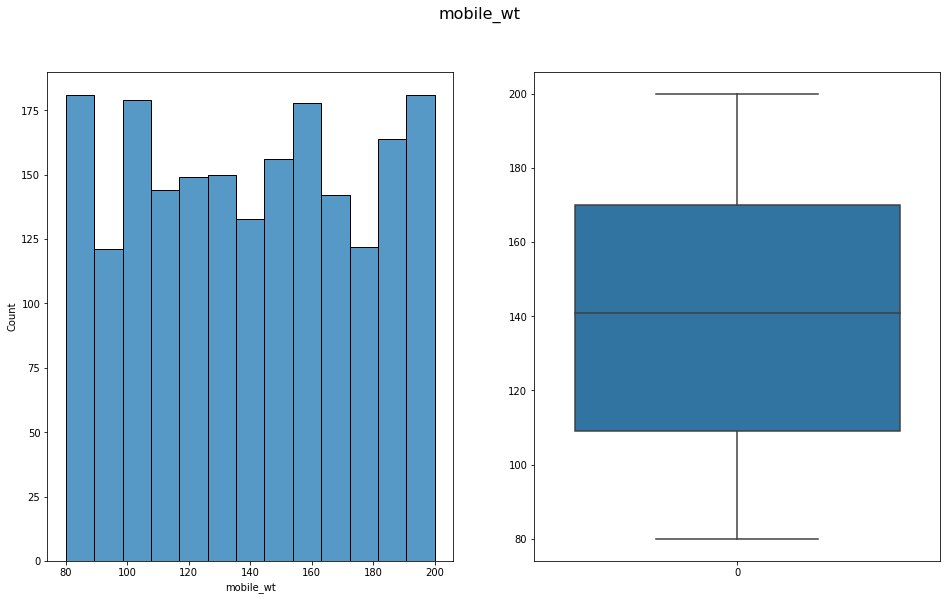

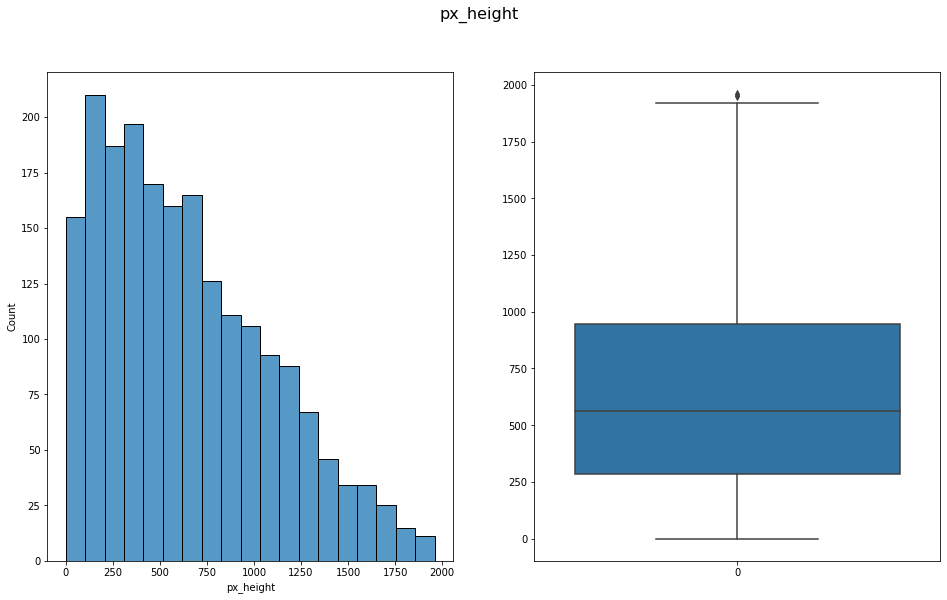

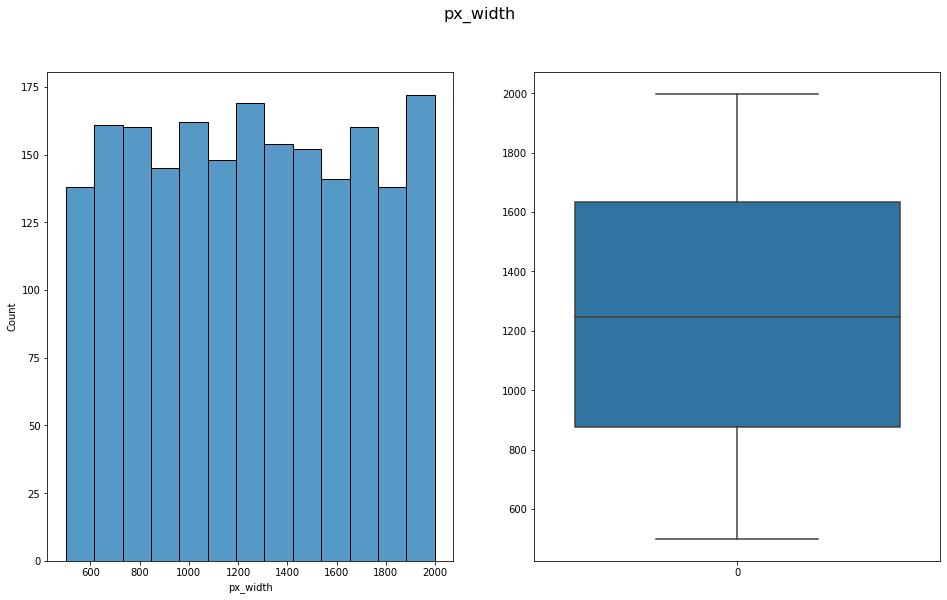

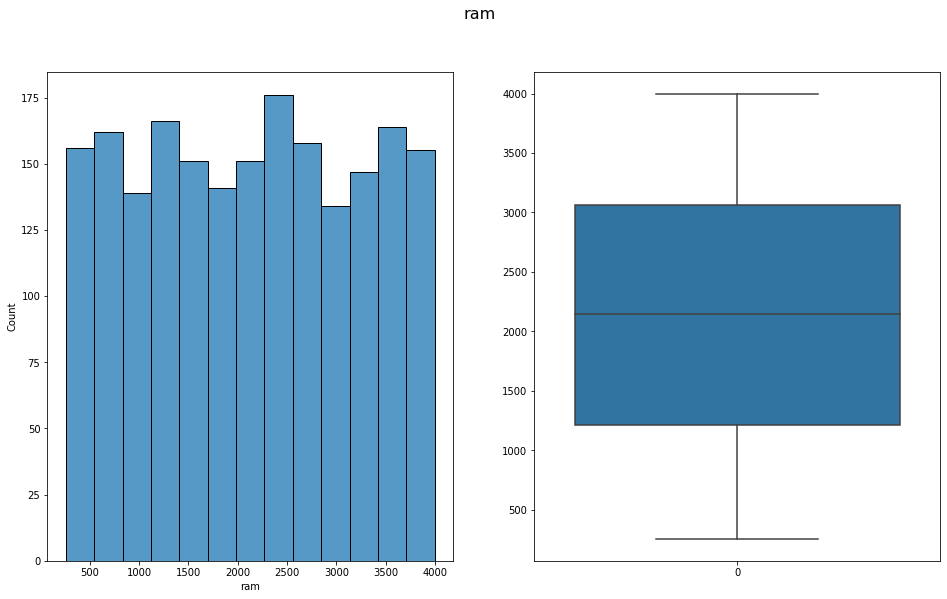

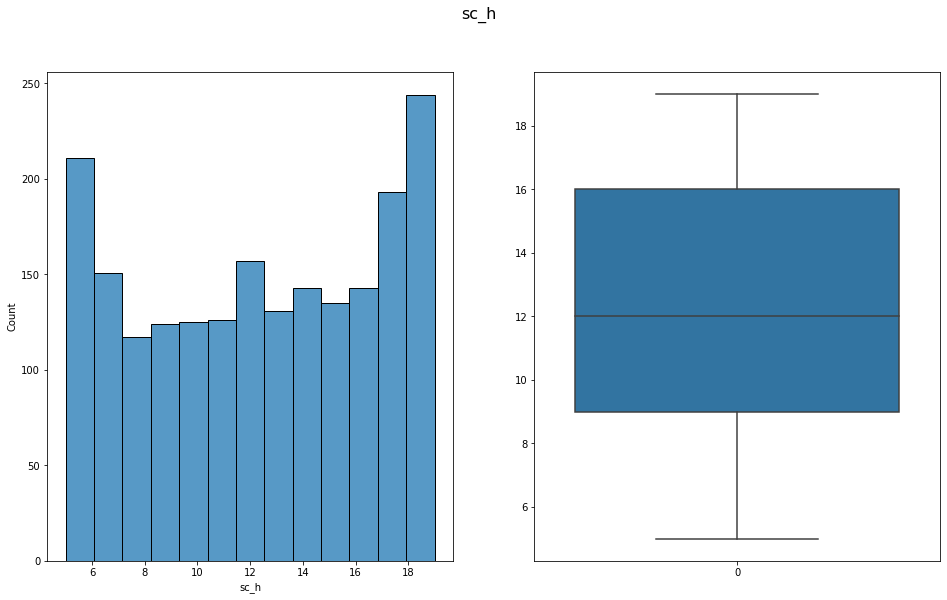

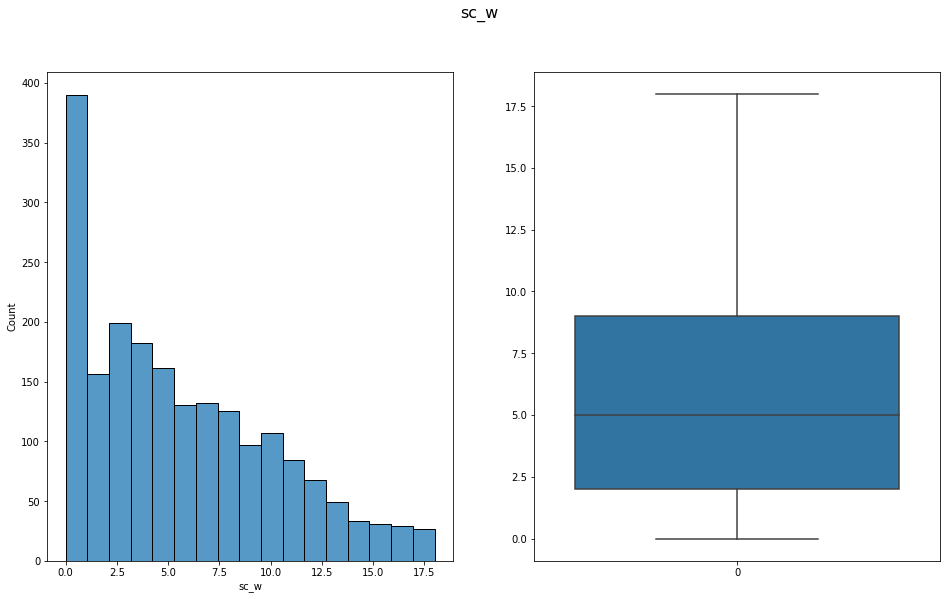

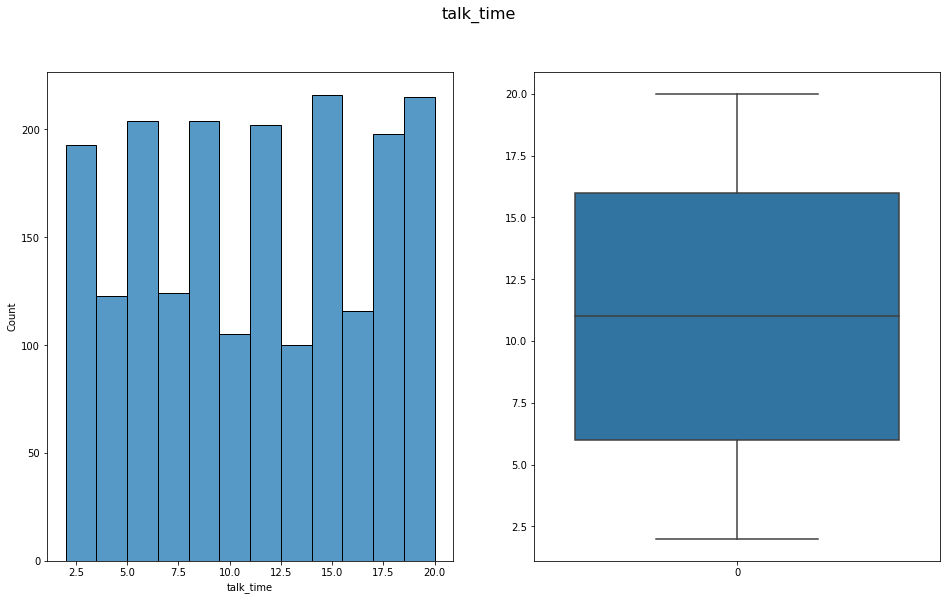

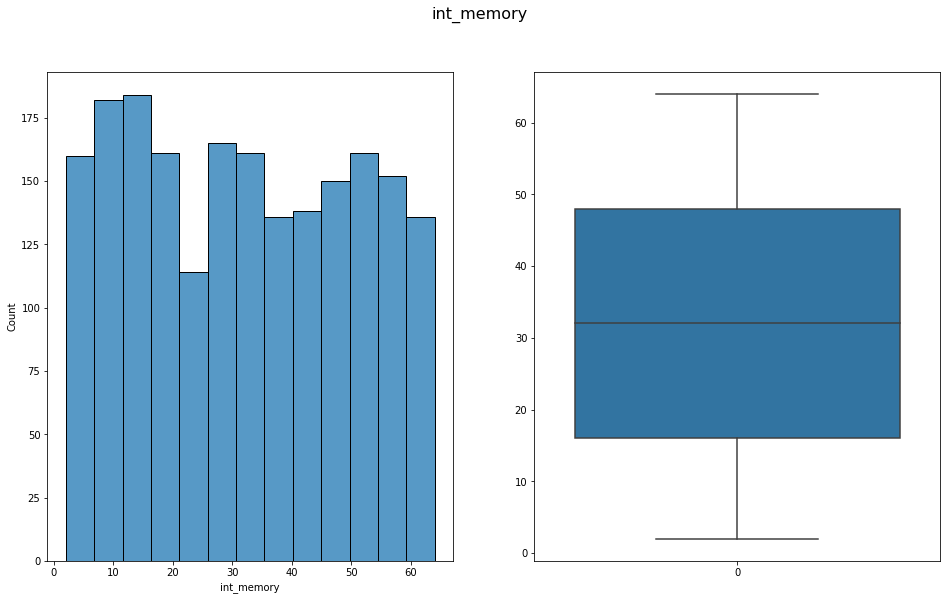

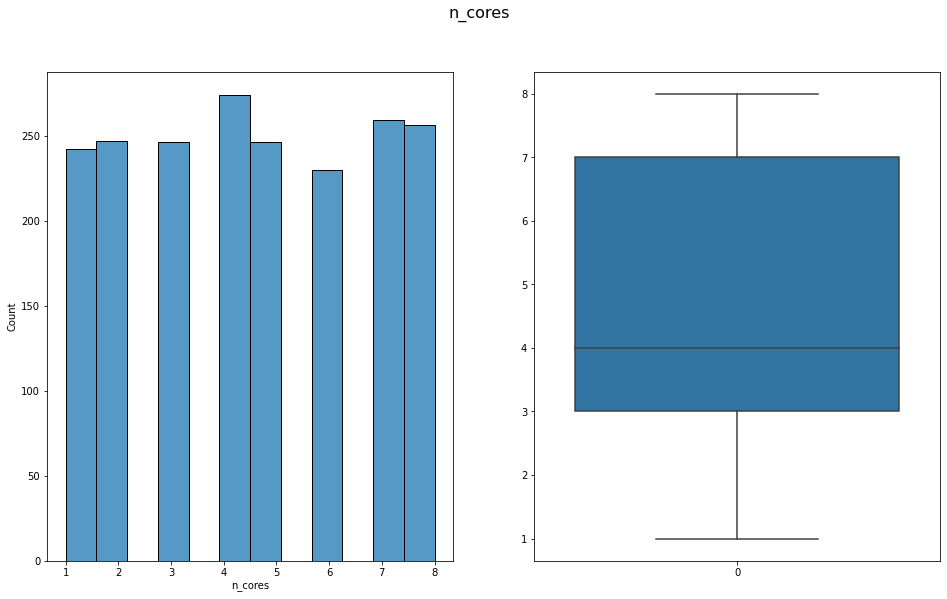

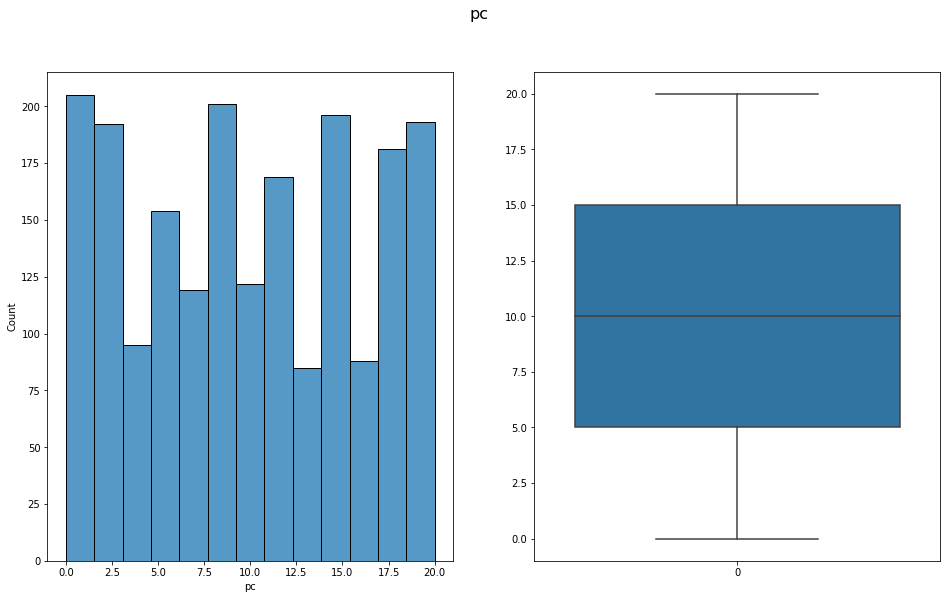

In [8]:
for c in float_variables:
    fig,ax = plt.subplots(1,2,figsize=(16,9))
    sns.histplot(mobile_df[c],ax=ax[0])
    sns.boxplot(data=mobile_df[c],ax=ax[1])
    fig.suptitle(c,fontsize=16)
    fig.show()

* Assimetria da distribuição nas variaveis: clock_speed ; sc_w ; px_height ; fc
* Poucos outliers - Interessante não retira-los
* Faxer bucketing nas variaveis: n_cores ; m_dep
* As demais variaveis apresentam boa simetria nos dados


2.2.1-) Valores Incongruentes

In [9]:
for c in float_variables:
    print(f'Quantidade de zeros na variavel {c}: {mobile_df[mobile_df[c]==0][c].count()}')


Quantidade de zeros na variavel clock_speed: 0
Quantidade de zeros na variavel m_dep: 0
Quantidade de zeros na variavel battery_power: 0
Quantidade de zeros na variavel fc: 474
Quantidade de zeros na variavel mobile_wt: 0
Quantidade de zeros na variavel px_height: 2
Quantidade de zeros na variavel px_width: 0
Quantidade de zeros na variavel ram: 0
Quantidade de zeros na variavel sc_h: 0
Quantidade de zeros na variavel sc_w: 180
Quantidade de zeros na variavel talk_time: 0
Quantidade de zeros na variavel int_memory: 0
Quantidade de zeros na variavel n_cores: 0
Quantidade de zeros na variavel pc: 101


2.3-) Correlação linear

In [10]:
pip install dython

Note: you may need to restart the kernel to use updated packages.


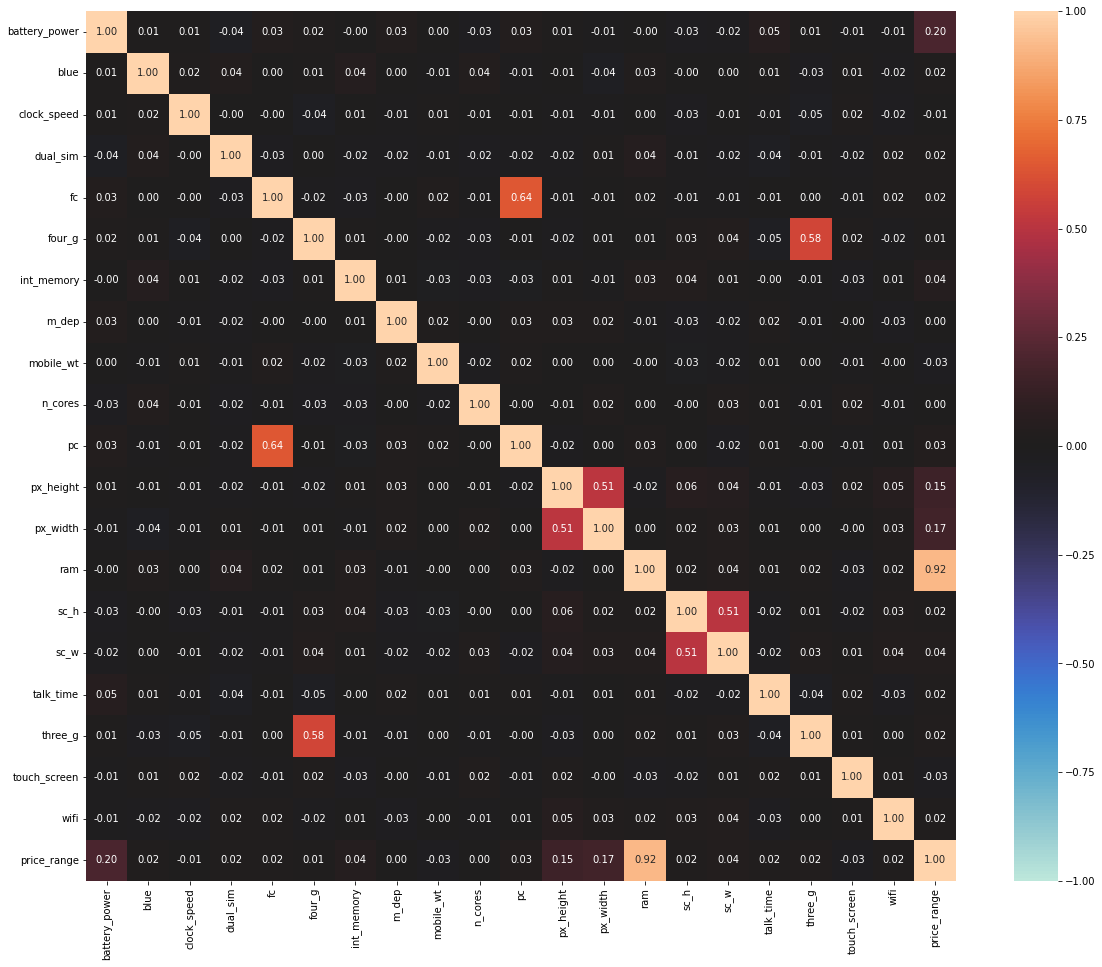

In [11]:
from dython.nominal import associations
complete_correlation= associations(mobile_df, filename= 'complete_correlation.png', figsize=(21,16))

A variavel ram apresenta forte correlação linear com o price_range

Outras correlações pronunciaveis:
* tree_g - four_g
* pc - fc
* sh_c - sh_w
* px_height - px_width
    
    Em ambos os casos analisar se faz sentido retirar uma das duas, pois são variaveis que estao correlacionadas pelas carcteristicas fisicas e eletronicas do celular.

2.3.1-) Correlação linear entre as features criadas

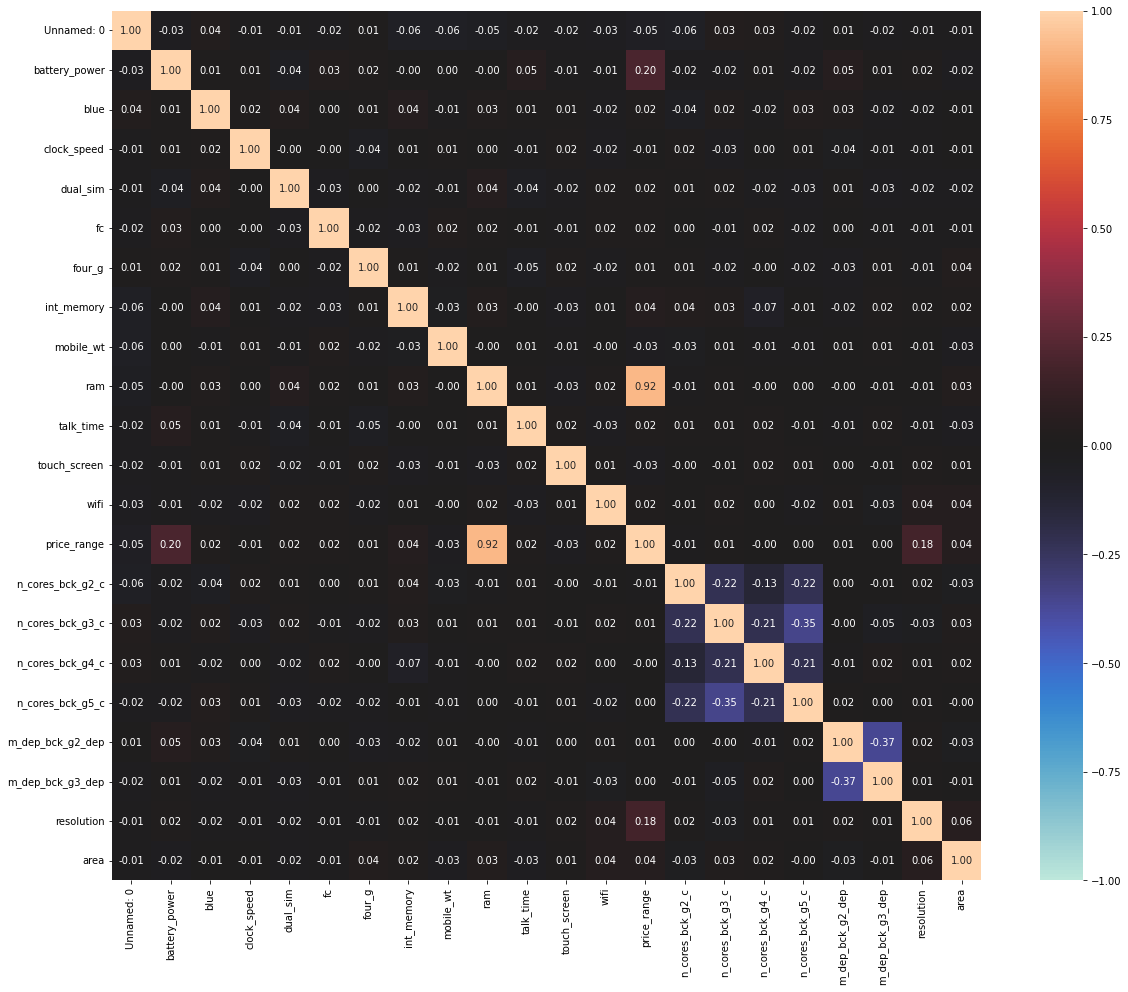

In [12]:
complete_correlation= associations(pd.read_csv('../input/mobile-featuers/features_mobile.csv'), filename= 'complete_correlation.png', figsize=(21,16))

One hot encoding não é adequedo para separação aletatoria das features no modelo Random Forest, pois cada tree precisa ter features descorrelacionadas. 